# Define the libraries

In [109]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import timedelta

# Define Function

In [110]:
def PlotData(Begin,Duration,Mistake,OncourtFrame,OncourtVideo,Time,Data1,Data2,Figuur,player,pdf):
    Start = int((((OncourtFrame - OncourtVideo)*100) + Begin/10) - Mistake*100)
    Stop = int(Start + Duration*100)
    fig, ax = plt.subplots()
    ax.plot(Time[Start:Stop],Data1[Start:Stop],'r',Time[Start:Stop],Data2[Start:Stop],'b')
    ax.legend(['Wheel Rotation Speed','Frame Rotation Speed'])
    ax.set_xlabel('Time (sec)')
    ax.set_title("Fast Defence " + str(Figuur) + ", " + str(player) + ", Video Time = " + str(timedelta(seconds=(int(Begin/1000)-Mistake))))
    pdf.savefig()

# Visualize Data
## Define player and match

In [111]:
Player = 6
Game = 1

## Insert Data player

In [112]:
df_Player = pd.read_csv('matrix_Player_' + str(Player) + '_game_' + str(Game) + '.csv')
df_Player.columns = ['frAcc','frRoAcc','frDispl','frRoAng','frSpeed','timeLine','frameRotationalSpeedX','frameRotationalSpeedY','frameRotationalSpeedZ','wheelRotationalSpeedX','wheelRotationalSpeedY','wheelRotationalSpeedZ','frRoSpeed']
df_Action = pd.read_csv('Ned_DUI_Game_' + str(Game) + '.csv')
df_Player

,frAcc,frRoAcc,frDispl,frRoAng,frSpeed,timeLine,frameRotationalSpeedX,frameRotationalSpeedY,frameRotationalSpeedZ,wheelRotationalSpeedX,wheelRotationalSpeedY,wheelRotationalSpeedZ,frRoSpeed
0,0.43685,0.000231,-0.001269,-0.143940,0.038689,0.01,-0.35000,0.32200,-0.336,0.82250,-0.35000,-1.4700,4.12000
1,1.00250,0.000640,-0.002502,-0.102740,0.043058,0.02,-0.33444,0.21000,-0.280,0.77000,-0.37000,-1.4000,1.53300
2,0.52034,0.001120,-0.003453,-0.087409,0.053083,0.03,-0.28000,0.21000,-0.259,0.88375,-0.39375,-1.4437,1.58150
3,0.66655,0.001677,-0.004248,-0.071594,0.058286,0.04,-0.30100,0.21000,-0.231,0.77000,-0.42000,-1.4700,-1.83280
4,-0.26420,0.002293,-0.005056,-0.089922,0.064952,0.05,-0.32667,0.23333,-0.280,0.77000,-0.38500,-1.5050,0.98345
...,...,...,...,...,...,...,...,...,...,...,...,...,...
770877,4.71880,4410.700000,11445.000000,-71.132000,-0.496620,7708.80,1.19000,-0.28000,-71.330,NaN,NaN,NaN,675.83000
770878,4.64350,4410.700000,11444.000000,-64.374000,-0.449430,7708.80,2.32400,-0.59500,-64.568,NaN,NaN,NaN,665.06000
770879,4.24790,4410.700000,11444.000000,-57.723000,-0.403000,7708.80,3.17100,-0.91700,-57.911,NaN,NaN,NaN,NaN
770880,NaN,NaN,NaN,NaN,NaN,NaN,3.95890,-1.00330,-51.823,NaN,NaN,NaN,NaN


## Define boundaries
### Get Timestamps from CSV

In [113]:
df_Action_Player = df_Action.loc[df_Action["Players Group Box"] == ("Player " + str(Player))]
df_Action_Player_Fast_defence = df_Action_Player.loc[df_Action_Player["Player"] == "Fast defence"]#.iloc[::-1]
Timestamp = df_Action_Player_Fast_defence.Position.to_numpy()
print(len(Timestamp))
Timestamp

8


array([771120, 715640, 439960, 340240, 320000, 251240, 198280, 156520])

### Synchronize
Times consist of the oncourt times in the video and the oncourt frames in Matlab

In [114]:
Times = [
         [((25.72)),2110.7],
         [((33*60)+1.28),3629.6],
         [((39*60)+39.60),5350.6],
         [((62*60)+16.44),6491.7]
        ]
Times[0][0]

25.72

In [115]:
Error = [10,10,2,6,-5,-2,-15,7]
print(len(Error))

8


### Visualize

In [116]:
pdf = PdfPages('Player_' + str(Player) + '_' + str(Game) + '_fastdefences.pdf')

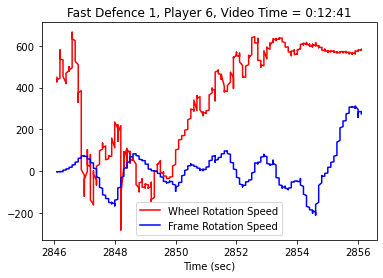

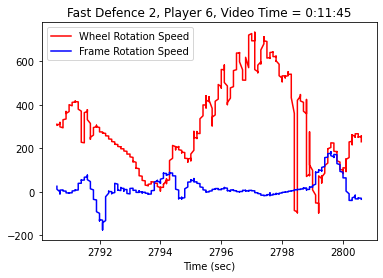

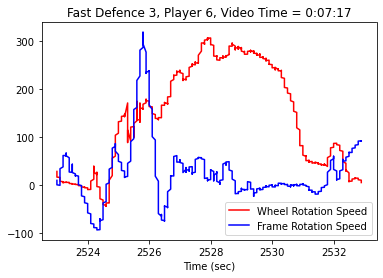

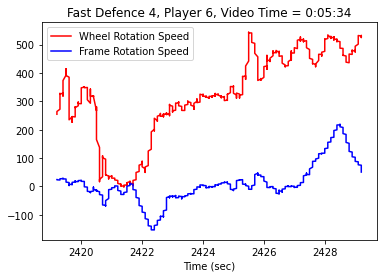

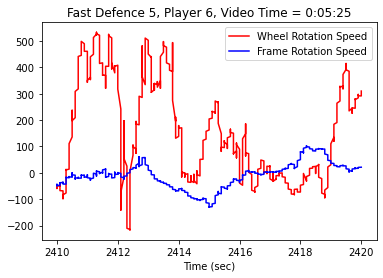

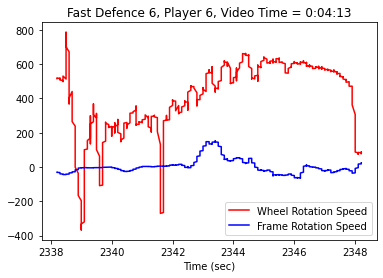

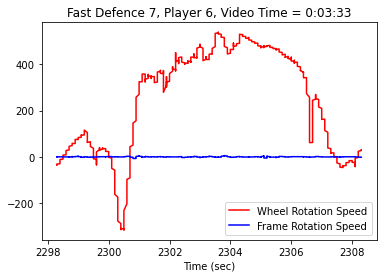

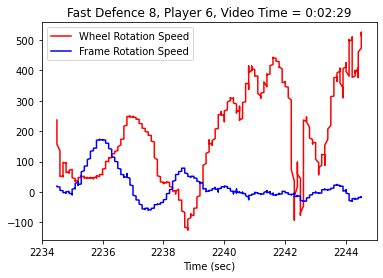

In [117]:
Quator = 0;
for i in range(0,len(Timestamp)):
    if Quator < (len(Times)-1):
        if Timestamp[i] >= (Times[Quator+1][0] * 1000):
            Quator = Quator + 1
    PlotData(Timestamp[i], 10, Error[i], Times[Quator][1], Times[Quator][0], df_Player.timeLine.to_numpy(), 
             df_Player.wheelRotationalSpeedX.to_numpy(), 
             df_Player.frameRotationalSpeedZ.to_numpy(),
             i+1,('Player ' + str(Player)), pdf)

In [118]:
pdf.close()